# 05. forecast(시계열 분석)

## 1. 배경 및 설치
- mac(intel)
    -  pip install fbprophet

---

## 함수(def)의 기초
- global 변수를 def 내에서 사용하고 싶다면 global로 선언

$$ y = asin(2\pi ft + t_0) +b $$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

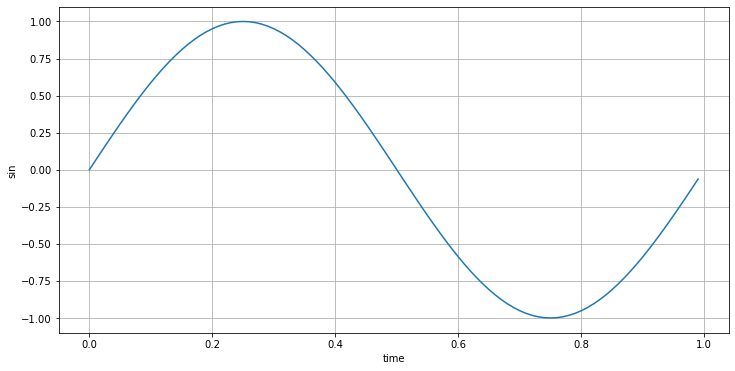

In [4]:
def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 *np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.show()
    
plotSinWave()

## 내가 만든 함수 import
- drawSinWave.py

In [18]:
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt

def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 *np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title('sinWave 함수')
    plt.show()
    
if __name__ == "__main__":
    plotSinWave(amp=1, endTime=2)

Overwriting ./drawSinWave.py


In [19]:
import drawSinWave as dS

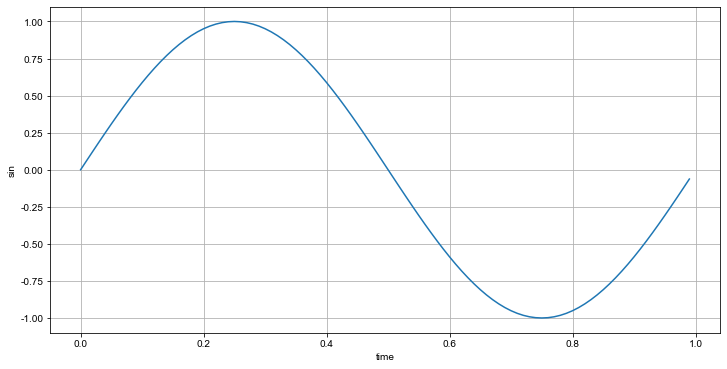

In [20]:
dS.plotSinWave()

## Matplotlib 그래프 한글 설정 모듈화

In [11]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
    print('matplotlib hangul settings done in Mac')
elif platform.system() == "Windows":
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
    print('matplotlib hangul settings done in Windows')
else:
    print('Unknown system..')
plt.rcParams["axes.unicode_minus"]=False

Overwriting ./set_matplotlib_hangul.py


In [12]:
import set_matplotlib_hangul 

matplotlib hangul settings done in Mac


Text(0.5, 1.0, '한글')

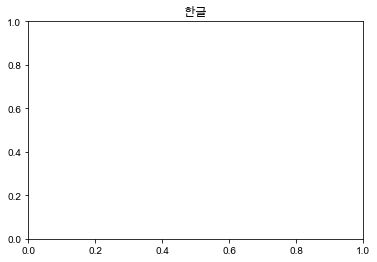

In [21]:
plt.title('한글')

---

## 2. Fbprophet 기초

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2024-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

In [4]:
df.head()

,ds,y
0,2024-01-01,0.000000
1,2024-01-02,0.103243
2,2024-01-03,0.205382
3,2024-01-04,0.305326
4,2024-01-05,0.402007


<AxesSubplot:>

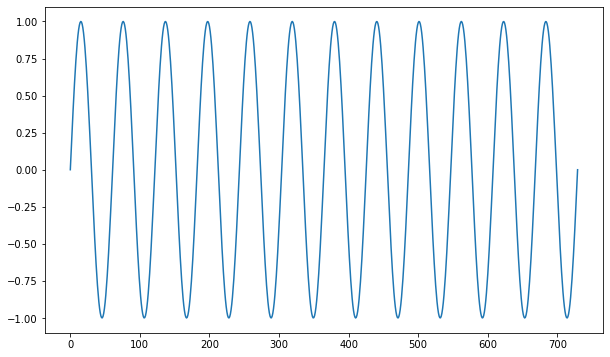

In [5]:
df["y"].plot(figsize=(10,6))

In [6]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

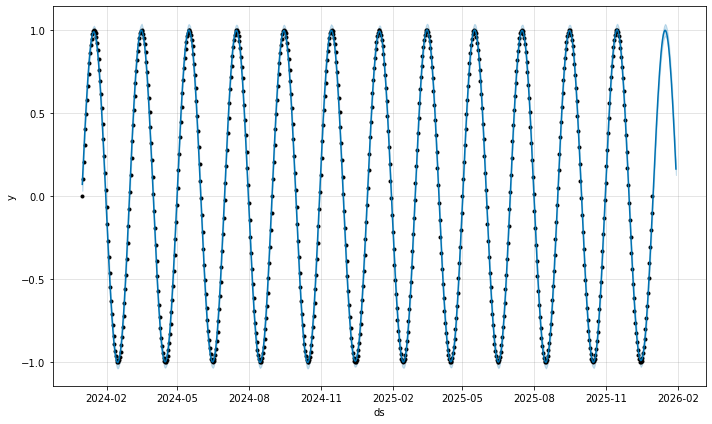

In [10]:
m.plot(forecast);

<AxesSubplot:>

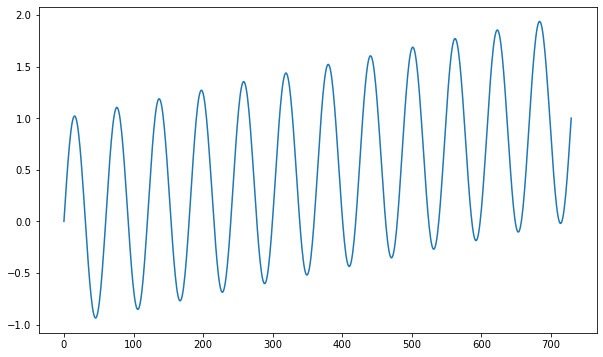

In [9]:
# 두번째 예제

time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range("2024-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

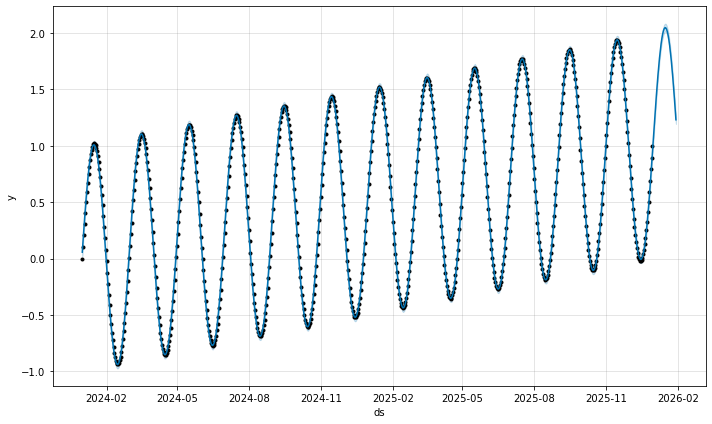

In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [12]:
# 3번째 예제

time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4
ds = pd.date_range("2024-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

<AxesSubplot:>

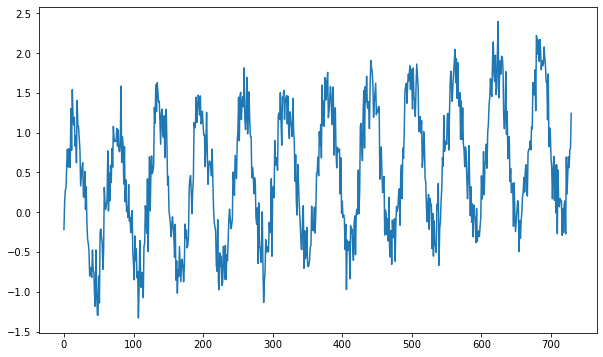

In [15]:
df["y"].plot(figsize=(10, 6))

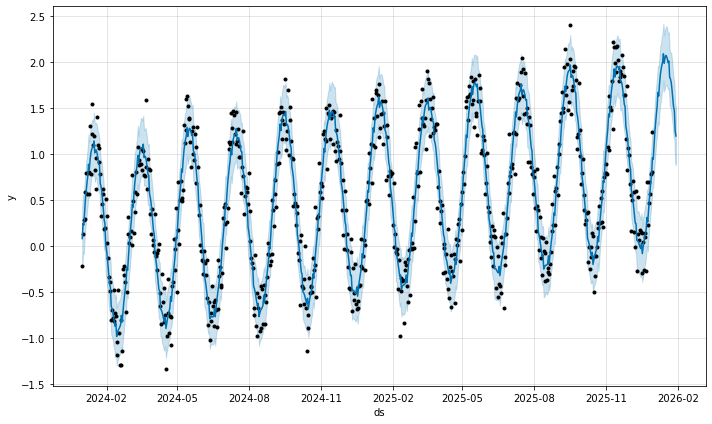

In [13]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

## 3. 시계열 데이터 실전 이용해보기
- pinkwink 블로그 방문자수 분석

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [3]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date", "hit"],
    index_col=0
)

pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0


In [4]:
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 16. 7. 1. to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [7]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


### 전체 데이터 그려보기

<AxesSubplot:xlabel='date'>

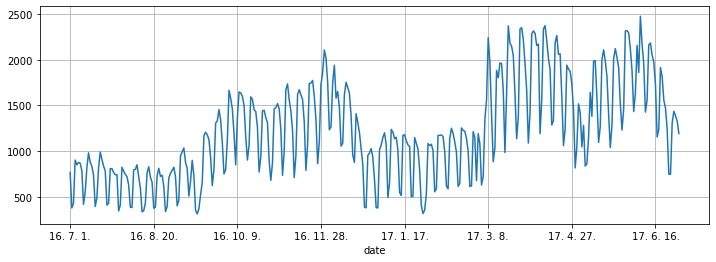

In [8]:
pinkwink_web["hit"].plot(figsize=(12, 4), grid=True)

### trend 분석을 시각화하기 위한 x축 값 만들기

In [9]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000)

### 에러를 계산할 함수

In [10]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y) ** 2))

In [13]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [16]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777308005031


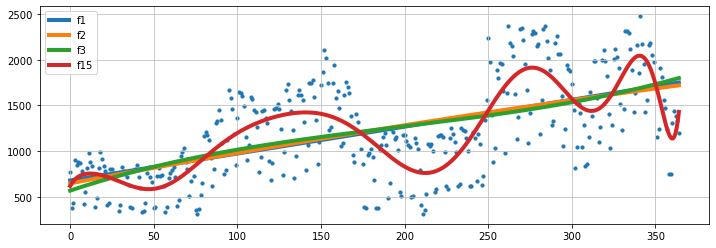

In [21]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

### 60일에 해당하는 데이터 예측

In [23]:
df = pd.DataFrame({"ds": pinkwink_web.index, "y":pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [24]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [25]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


#### 예측 결과는 상한/하한의 범위를 포함해서 얻어진다

In [27]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.900875,710.091260,1145.487421
421,2017-08-26,497.990528,287.690507,724.157373
422,2017-08-27,630.552535,420.834395,846.359816
423,2017-08-28,1183.094019,980.194082,1391.068480
424,2017-08-29,1219.031459,1006.099773,1427.452429


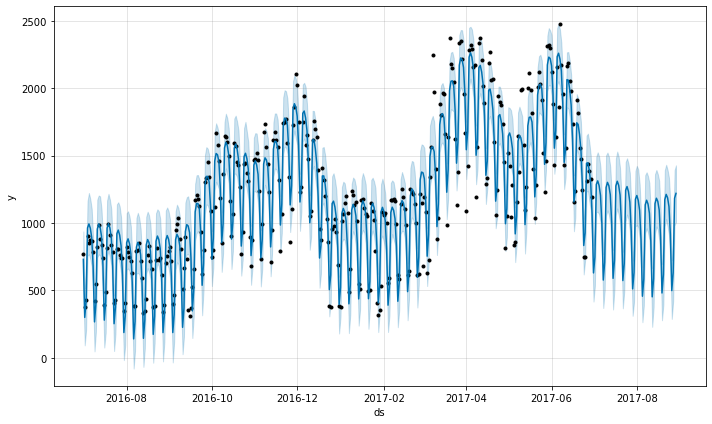

In [28]:
m.plot(forecast);

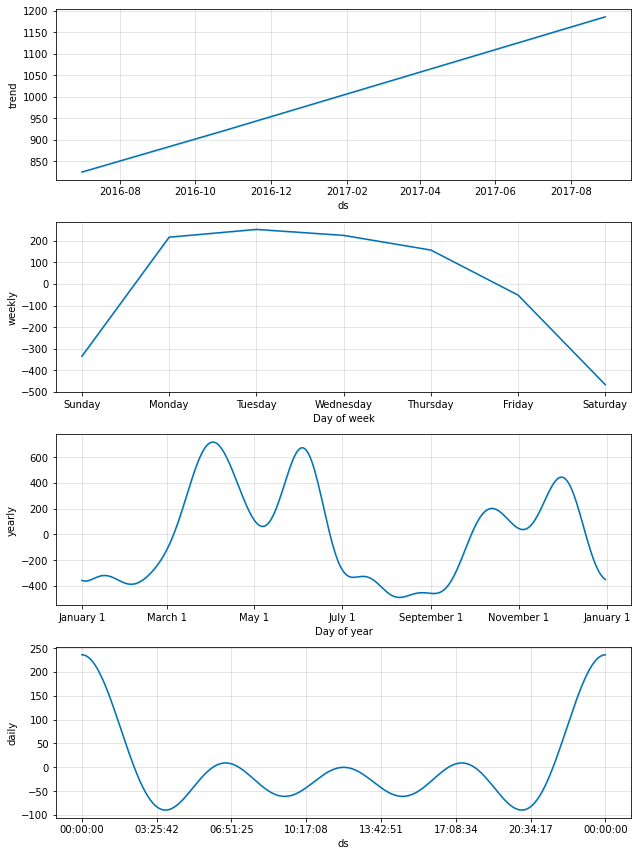

In [29]:
m.plot_components(forecast);